In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

import seaborn as sns

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

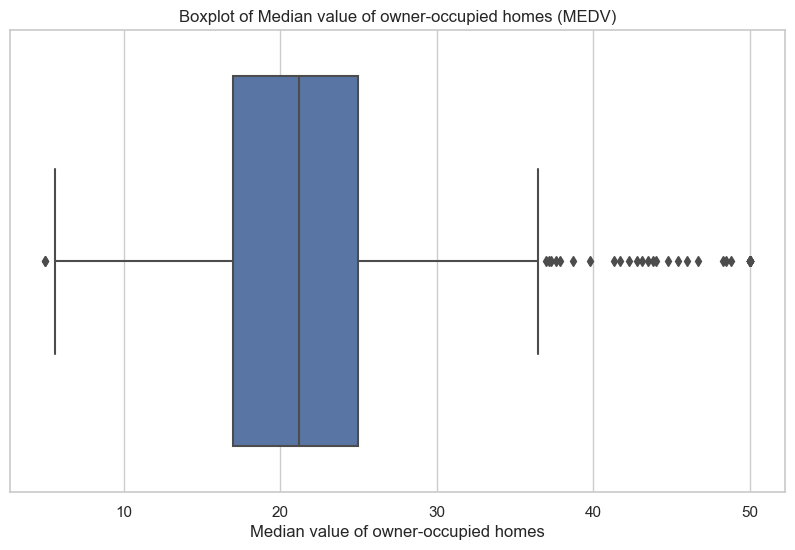

In [4]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.boxplot(x=boston_df['MEDV'])
plt.title('Boxplot of Median value of owner-occupied homes (MEDV)')
plt.xlabel('Median value of owner-occupied homes')
plt.show()

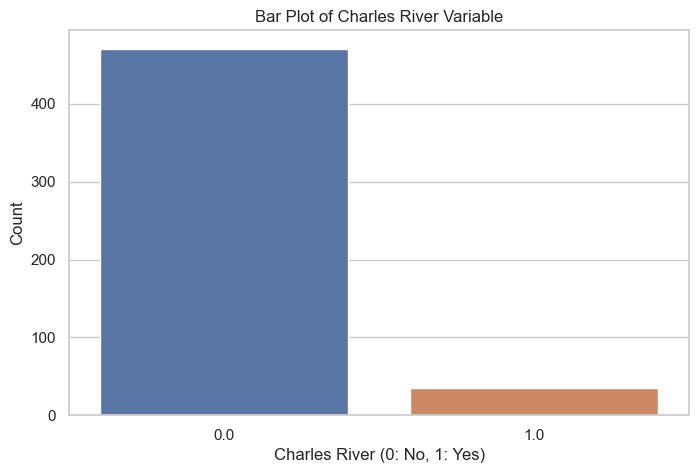

In [5]:
plt.figure(figsize=(8, 5))

sns.countplot(x='CHAS', data=boston_df)
plt.title('Bar Plot of Charles River Variable')
plt.xlabel('Charles River (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

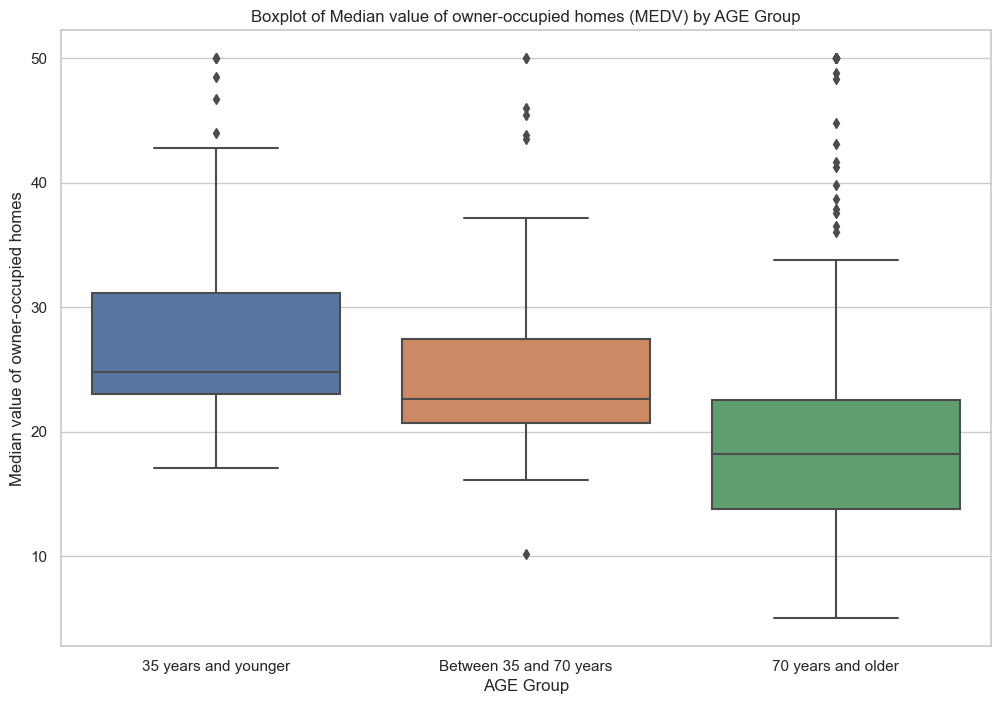

In [7]:
plt.figure(figsize=(12, 8))

# Discretize the AGE variable
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], 
                         bins=[0, 35, 70, max(boston_df['AGE'])], labels=['35 years and younger', 'Between 35 and 70 years', '70 years and older'])

sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
plt.title('Boxplot of Median value of owner-occupied homes (MEDV) by AGE Group')
plt.xlabel('AGE Group')
plt.ylabel('Median value of owner-occupied homes')
plt.show()


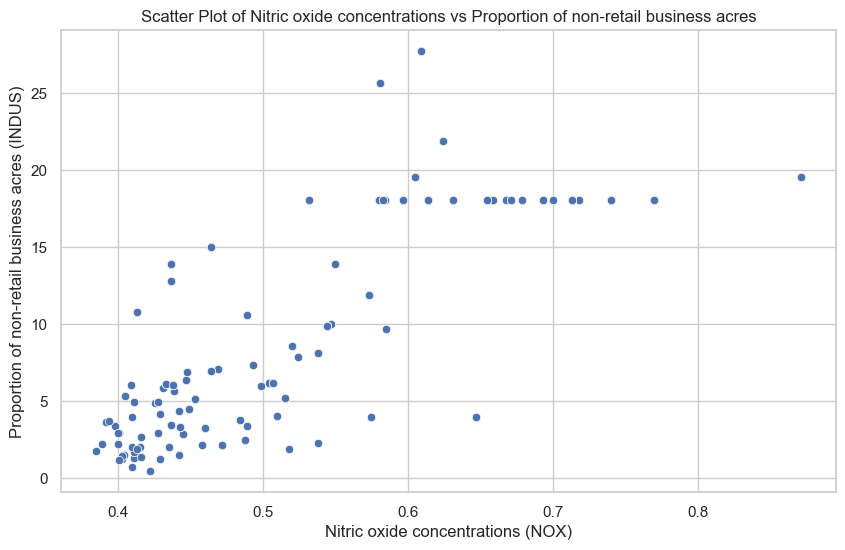

In [8]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.title('Scatter Plot of Nitric oxide concentrations vs Proportion of non-retail business acres')
plt.xlabel('Nitric oxide concentrations (NOX)')
plt.ylabel('Proportion of non-retail business acres (INDUS)')
plt.show()

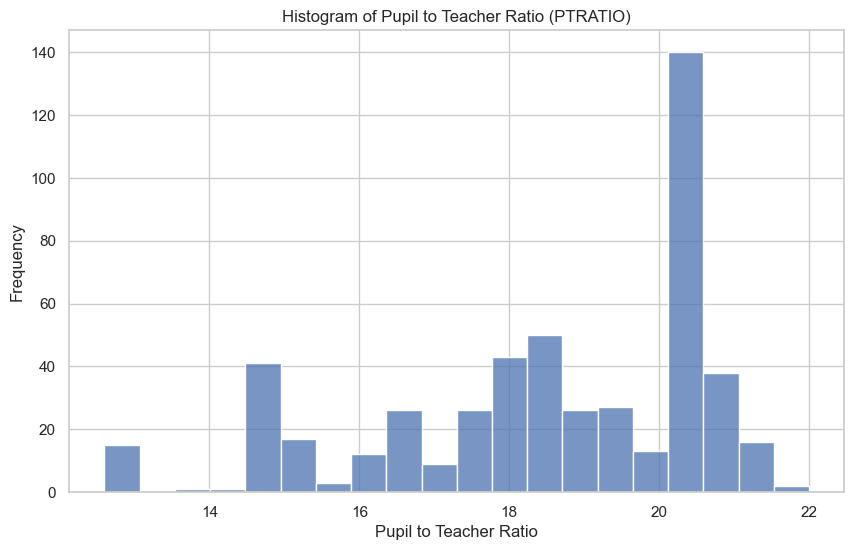

In [9]:
plt.figure(figsize=(10, 6))

sns.histplot(boston_df['PTRATIO'], bins=20, kde=False)
plt.title('Histogram of Pupil to Teacher Ratio (PTRATIO)')
plt.xlabel('Pupil to Teacher Ratio')
plt.ylabel('Frequency')
plt.show()

For each of the following questions;

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:

State your hypothesis.

Use α = 0.05

Perform the test Statistics.

State the conclusion from the test.

__Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)__

Hypothesis:

Null Hypothesis (H0): There is no significant difference in the median value of houses between those bounded by the Charles River and those not bounded.
Alternative Hypothesis (H1): There is a significant difference in the median value of houses between those bounded by the Charles River and those not bounded.

In [12]:
from scipy.stats import ttest_ind

charles_river = boston_df[boston_df['CHAS'] == 1]['MEDV']
not_charles_river = boston_df[boston_df['CHAS'] == 0]['MEDV']

t_statistic, p_value = ttest_ind(charles_river, not_charles_river)

In [13]:
p_value

7.390623170519905e-05

Conclusion:

Since p_value < 0.05, reject the null hypothesis.

__Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)__

Hypothesis:

Null Hypothesis (H0): There is no significant difference in the median values of houses for different age groups.
Alternative Hypothesis (H1): There is a significant difference in the median values of houses for different age groups.

In [15]:
from scipy.stats import f_oneway

f_statistic, p_value = f_oneway(boston_df[boston_df['AGE_GROUP'] == '35 years and younger']['MEDV'],
                                 boston_df[boston_df['AGE_GROUP'] == 'Between 35 and 70 years']['MEDV'],
                                 boston_df[boston_df['AGE_GROUP'] == '70 years and older']['MEDV'])

In [17]:
p_value

1.7105011022702984e-15

Conclusion:
Since p-value less than 0.05, reject null hypothesis.

__Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town? (Pearson Correlation)__

Hypothesis:

Null Hypothesis (H0): There is no significant correlation between Nitric oxide concentrations and the proportion of non-retail business acres per town.
Alternative Hypothesis (H1): There is a significant correlation between Nitric oxide concentrations and the proportion of non-retail business acres per town.

In [19]:
from scipy.stats import pearsonr

correlation_coefficient, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])

In [20]:
p_value

7.913361061228798e-98

Conclusion:

Since p_value < 0.05, reject the null hypothesis.

__What is the impact of an additional weighted distance to the five Boston employment centers on the median value of owner-occupied homes? (Regression Analysis)__

Hypothesis:

Null Hypothesis (H0): The additional weighted distance to the five Boston employment centers has no impact on the median value of owner-occupied homes.
Alternative Hypothesis (H1): The additional weighted distance to the five Boston employment centers has a significant impact on the median value of owner-occupied homes.

In [22]:
import statsmodels.api as sm

X = sm.add_constant(boston_df['DIS'])  # Adding a constant term to the predictor
y = boston_df['MEDV']

model = sm.OLS(y, X).fit()

In [25]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           1.21e-08
Time:                        01:50:53   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

Conclusion:

The p-value for the DIS coefficient is < 0.05, reject the null hypothesis.